# Proof of concept of Emissions Prediction Machine Learning Model
The first version will be implemented with scikit-learn



       Country  year   emissions
0          ABW  1850    0.041900
1          AFG  1850    0.080300
2          AGO  1850   -0.611000
3          AIA  1850    0.000164
4          ALB  1850    2.110000
...        ...   ...         ...
799915     WSM  2014    0.000069
799916     YEM  2014    0.000000
799917     ZAF  2014    1.240000
799918     ZMB  2014  251.000000
799919     ZWE  2014   36.000000

[799920 rows x 3 columns]


/Users/alex/opt/anaconda3/envs/fastapi-vizz-challenge/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: title={'center': 'Emissions by country and year'}, xlabel='year', ylabel='emissions'>

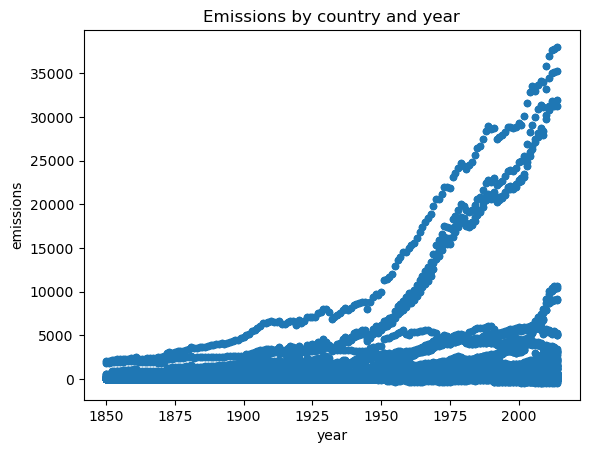

In [6]:
import os
# Import libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression


# Read the CSV file
data = pd.read_csv('./data/emissions.csv')

# Drop unnecessary columns
data = data.drop(columns=['Sector', 'Parent sector'])

# Melt the dataframe to have a long format with 'year' and 'emissions' columns

data = data.melt(id_vars=['Country'], var_name='year', value_name='emissions')

# Convert the year column to integer
data['year'] = data['year'].astype(int)


# Plot the data with X axis as year and Y axis as emissions, and each row that represents a country is a different color, also add some identifying information
#TODO: investigate how can I add a different color for each country and also some identifying information
data.plot(x='year', y='emissions', kind='scatter', colormap='viridis', title='Emissions by country and year')



In [2]:
# Split the data into input features and output, and then into training and test sets.

from sklearn.model_selection import train_test_split

# Split data into input features and output
X = data[['Country', 'year']]
y = data['emissions']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode the categorical data:
used to perform one-hot encoding on the 'Country' variable in a pandas DataFrame, which is a common technique for converting categorical data into a numerical format that can be used in machine learning. One-hot encoding works by creating new binary columns for each unique category in the original column. The OneHotEncoder class from the sklearn.preprocessing module is used to perform the one-hot encoding.

The fit_transform method of the OneHotEncoder class is called with the 'Country' column of the X_train DataFrame as input to fit the one-hot encoder to the 'Country' column and create a one-hot encoded representation of it. This encoded column is stored in a new DataFrame called X_train_encoded.

The transform method of the OneHotEncoder class is then called with the 'Country' column of the X_test DataFrame as input to create a one-hot encoded representation of it. This encoded column is stored in a new DataFrame called X_test_encoded.

After performing these steps, the 'Country' column in both X_train_encoded and X_test_encoded will be replaced with their one-hot encoded versions, which allows them to be used as input features in a machine learning algorithm. One-hot encoding is necessary for machine learning algorithms that cannot work with categorical data directly, and it enables the data to be more easily interpreted and analyzed.

In [3]:
# Encode the 'Country' column using one-hot encoding.
from sklearn.preprocessing import OneHotEncoder

# Create the encoder
encoder = OneHotEncoder(handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train[['Country']])
X_test_encoded = encoder.transform(X_test[['Country']])

In [4]:
# Combine the encoded 'Country' column with the 'year' column
import numpy as np

# X_train_encoded.toarray() returns a numpy array with the one-hot encoded values
# X_train['year'].values.reshape(-1, 1) returns a numpy array with the year values
# np.hstack([X_train_encoded.toarray(), X_train['year'].values.reshape(-1, 1)]) returns a numpy array with the one-hot encoded values and the year values

X_train_final = np.hstack([X_train_encoded.toarray(), X_train['year'].values.reshape(-1, 1)])
X_test_final = np.hstack([X_test_encoded.toarray(), X_test['year'].values.reshape(-1, 1)])

In [5]:
# Train a linear regression model

from sklearn.linear_model import LinearRegression

print(X_test_final, y_test)

model = LinearRegression()
model.fit(X_train_final, y_train)

[[   0.    0.    0. ...    0.    0. 1919.]
 [   0.    0.    0. ...    0.    0. 2009.]
 [   0.    0.    0. ...    0.    0. 1887.]
 ...
 [   0.    0.    0. ...    0.    0. 1889.]
 [   0.    0.    0. ...    0.    0. 1892.]
 [   0.    0.    0. ...    0.    0. 1917.]] 337307     0.733000
771857     0.066800
182404     0.000001
36370      0.000151
311703     0.000024
            ...    
317029     0.000693
282163     0.000284
193088     0.000004
204240     0.000055
327323    17.100000
Name: emissions, Length: 159984, dtype: float64


LinearRegression()

In [8]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test_final)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R-squared:", r2)

# MSE: 307093.49994842446
# R-squared: 0.14388726166850496

MSE: 307093.49994842446
R-squared: 0.14388726166850496


The performance of the model, as indicated by the given MSE and R-squared values, appears to be relatively poor. The MSE value is quite high, meaning the model's predictions are significantly different from the actual values. Additionally, the R-squared value is low, which means that the model only explains a small portion of the variance in the data.

Some steps we could take to improve the performance of the model include:

The model may not be complex enough to capture the underlying patterns in the data. As suggested earlier, you can try different models, such as decision trees or support vector machines, to see if they perform better.

Feature engineering may improve the model's performance. For instance, you could add additional features like population or GDP that could help the model better understand the relationship between the country, year, and greenhouse gas emissions.

Ensure the data is properly preprocessed, and any missing values or outliers are handled appropriately. These issues can have a significant impact on model performance.

Validate the model using cross-validation, which will give you a better idea of how well the model generalizes to new data. This technique involves splitting the dataset into multiple smaller training and validation sets and averaging the performance across them.

If possible, gather more data or use data augmentation techniques to create more training examples. This can help the model learn more about the underlying patterns in the data.

Hyperparameter tuning might help in optimizing the model's performance. You can use GridSearchCV or RandomizedSearchCV from scikit-learn to search for the best hyperparameters.

Keep in mind that improving the model's performance may require experimentation with different approaches. Iterate through the suggested improvements to see which one has the most significant impact on your specific problem.

In [11]:
# Test the model with predictions

def predict_emissions(country, year):
    # Encode the country
    encoded_country = encoder.transform([[country]])

    # Combine encoded country and year
    input_data = np.hstack([encoded_country.toarray(), np.array([[year]])])

    # Make the prediction
    prediction = model.predict(input_data)
    return prediction

# Example: predict emissions for Afghanistan (AFG) in 2020
emissions_prediction = predict_emissions('AFG', 2020)
print("Predicted emissions:", emissions_prediction)


# Throws a encoding error, investigate why and how to fix it
# /Users/alex/opt/anaconda3/envs/fastapi-vizz-challenge/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
#   warnings.warn(

Predicted emissions: [61.20207462]


/Users/alex/opt/anaconda3/envs/fastapi-vizz-challenge/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
